In [26]:
#Getting access to our program to the google drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data importing and prepration

In [27]:
#Importing the neccesory libratries
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#importing the file from the google drive
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Regression_project/model.csv')

In [29]:
#A view of our dataset shape
df.shape

(12000, 23)

In [30]:
#Showing some samples of our dataset
df.sample(10)

,id,duration,codec,width,height,bitrate,category,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
2998,2999,157.801670,h264,1280,720,2885589,Travel & Events,25.0,72,3873,0,3945,5611970,51306874,0,56918844,vp8,109000,24.0,640,480,216020,14.805
5208,5209,49.178333,mpeg4,176,144,54338,Howto & Style,7.0,10,334,0,344,33046,300986,0,334032,h264,539000,24.0,1920,1080,651536,47.015
3786,3787,217.518000,h264,480,360,83054,Gaming,29.0,112,6408,0,6520,406683,1851539,0,2258222,h264,109000,15.0,1920,1080,650600,20.905
2583,2584,127.221664,h264,1920,1080,3080852,Autos & Vehicles,23.0,70,2980,0,3050,3818903,45174992,0,48993895,h264,539000,24.0,320,240,217544,14.741
2745,2746,203.198000,flv,320,240,239336,Sports,29.0,104,5974,0,6078,853613,5225468,0,6079081,h264,109000,25.0,1920,1080,612196,32.502
7164,7165,39.055000,h264,1920,1080,5992818,People & Blogs,30.0,26,1144,0,1170,839251,28416939,0,29256190,vp8,3000000,12.0,1920,1080,215940,38.338
4503,4504,39.055000,h264,1920,1080,5992818,Entertainment,30.0,26,1144,0,1170,839251,28416939,0,29256190,vp8,539000,25.0,1280,720,215940,27.446
10489,10490,64.933000,flv,320,240,236793,Pets & Animals,15.0,39,936,0,975,318954,1603007,0,1921961,vp8,56000,24.0,1920,1080,217080,19.781
1911,1912,290.016660,mpeg4,176,144,52783,People & Blogs,12.0,61,3417,0,3478,119325,1794184,0,1913509,h264,820000,25.0,1920,1080,630244,65.332
8985,8986,130.356670,mpeg4,176,144,54590,People & Blogs,12.0,27,1537,0,1564,64483,825054,0,889537,vp8,539000,24.0,1920,1080,87124,20.937


In [31]:
#Checkihng if there is any null values in our dataset
df.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
category       0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

In [32]:
#Getting the dataset columns
df.columns

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'category',
       'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size',
       'size', 'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height',
       'umem', 'utime'],
      dtype='object')

In [33]:
#Showing the types of variables in our dataset
df.dtypes

id               int64
duration       float64
codec           object
width            int64
height           int64
bitrate          int64
category        object
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [34]:
#Defining the categorical variables, which are 3 in this case
df_categorical=df[['codec', 'category', 'o_codec']]
df_categorical.head()

,codec,category,o_codec
0,vp8,People & Blogs,vp8
1,h264,People & Blogs,flv
2,h264,Sports,h264
3,vp8,Gaming,h264
4,flv,Music,mpeg4


In [35]:
#Defining numerical variables
df_numerical=df[['duration', 'width', 'height', 'bitrate',
       'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size',
       'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height',
       'umem', 'utime']]
df_numerical.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,645.84000,320,240,95903,25.032558,138,16008,0,16146,1081321,6660941,0,7742262,109000,29.97,1280,720,218932,15.929
1,326.58832,1920,1080,5999648,23.000000,174,7656,0,7830,16603953,228322925,0,244926878,820000,29.97,1920,1080,218932,10.417
2,473.00000,320,240,164017,25.000000,198,10924,704,11826,1419320,8047423,0,9697521,242000,24.00,1920,1080,645544,45.327
3,448.57500,1280,720,2052426,30.002232,92,13349,0,13441,9132637,105950761,0,115083398,3000000,15.00,1920,1080,655172,102.842
4,255.28000,320,240,250276,25.000000,110,6272,0,6382,611474,7374864,0,7986338,820000,25.00,1920,1080,216820,14.937


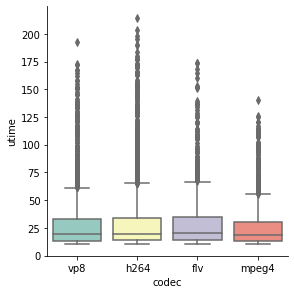

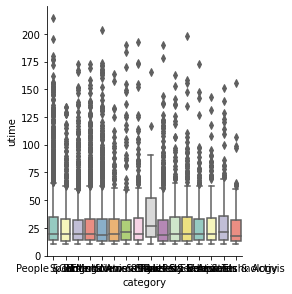

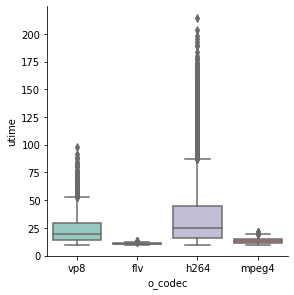

In [36]:
#Investigating categorical variables using boxplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y="utime",
            kind="box", palette="Set3",height=4);
plt.show()



In [37]:
#Defining dummy Variables to make the data interpretable for the classifiers
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activis,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_h264,o_codec_mpeg4,o_codec_vp8
11995,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
11997,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
11998,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b81fd18d0>,
      dtype=object)

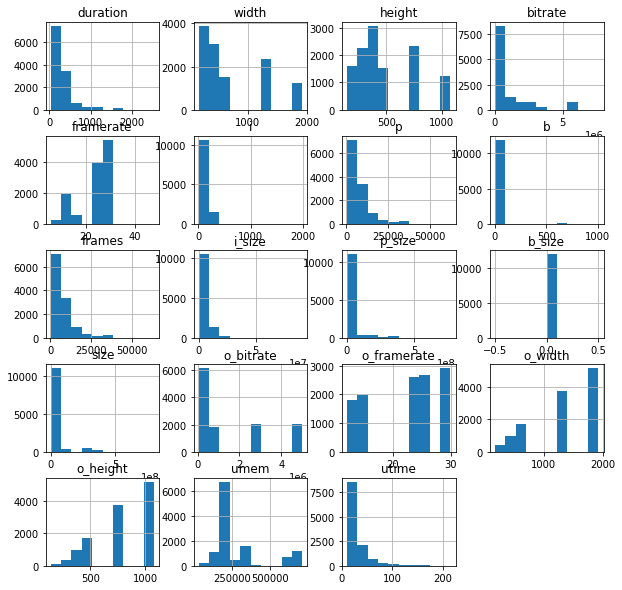

In [38]:
#Plotting the histogram of the numerical variables
df_numerical.hist(figsize=(10,10))

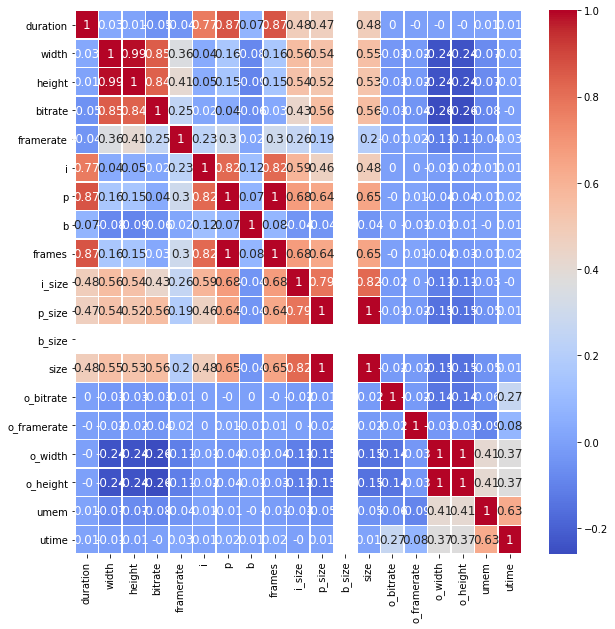

In [39]:
#sns plot of the variables to investigate the correlation between them
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

In [40]:
#deleting the correlated data
df_numerical1=df_numerical.drop(['width','p','duration','i','i_size','o_height','bitrate'],axis='columns')

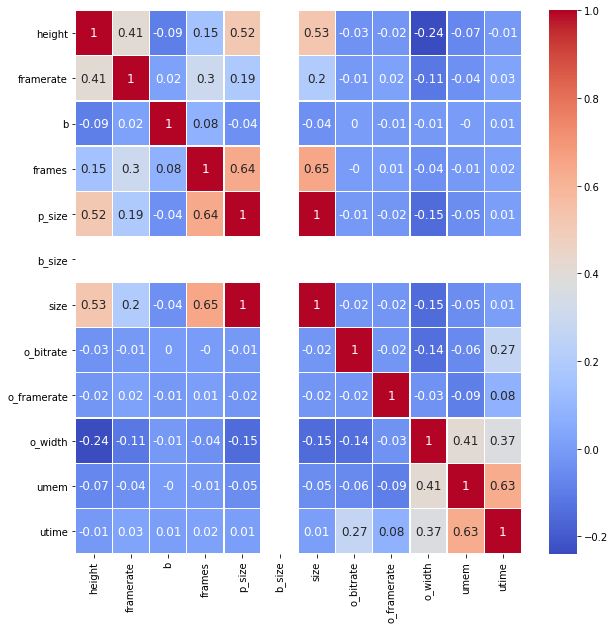

In [41]:
#Plotting sns plot of the values which are now less correlated!!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical1.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

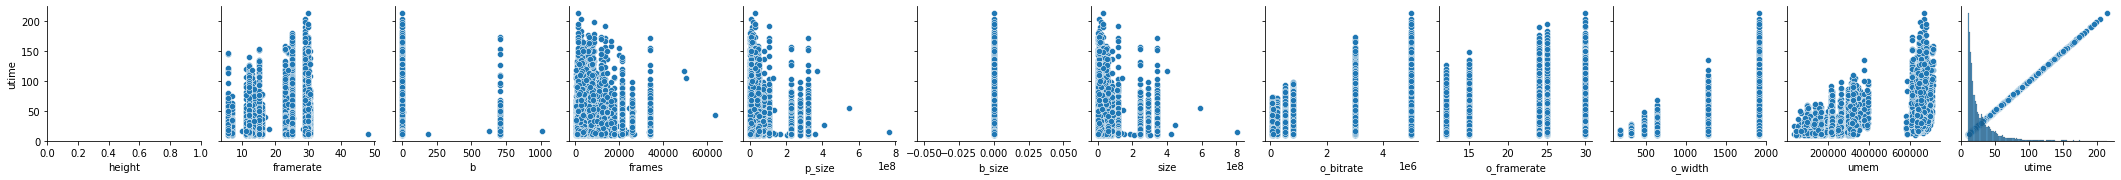

In [42]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical1, x_vars=df_numerical1.columns, y_vars='utime')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b80acb550>,
      dtype=object)

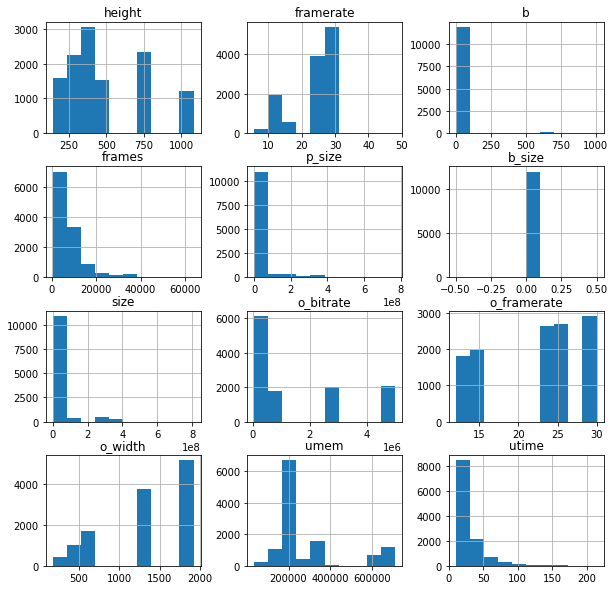

In [43]:
#plotting the histogram of the new numerical variables
df_numerical1.hist(figsize=(10,10))

Scaler

In [44]:
df_numerical1=df_numerical1.drop(['utime'],axis='columns')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical1)
scaled_df = pd.DataFrame(scaler.transform(df_numerical1))
scaled_df.columns = df_numerical1.columns

scaled_df.head()

,height,framerate,b,frames,p_size,b_size,size,o_bitrate,o_framerate,o_width,umem
0,-0.817564,0.144284,-0.110700,1.434653,-0.379757,0.0,-0.390518,-0.821838,1.180610,-0.146451,-0.473726
1,2.203656,-0.153337,-0.110700,0.151185,3.123759,0.0,3.141591,-0.432345,1.180610,0.995025,-0.473726
2,-0.817564,0.139516,9.013614,0.767916,-0.357843,0.0,-0.361400,-0.748979,0.250827,0.995025,2.146757
3,0.908848,0.871977,-0.110700,1.017171,1.189585,0.0,1.207986,0.761883,-1.150855,0.995025,2.205898
4,-0.817564,0.139516,-0.110700,-0.072295,-0.368473,0.0,-0.386883,-0.432345,0.406570,0.995025,-0.486699


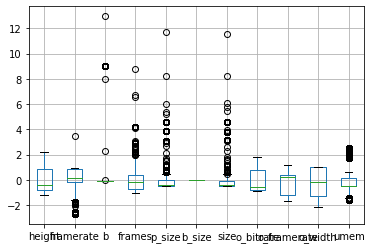

In [45]:
scaled_df.boxplot()

In [46]:
X_numerical=scaled_df.iloc[:,:-1]

In [47]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(12000, 21)
(12000, 10)


,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activis,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_h264,o_codec_mpeg4,o_codec_vp8
11995,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
11997,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
11998,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [48]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activis,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_h264,o_codec_mpeg4,o_codec_vp8,height,framerate,b,frames,p_size,b_size,size,o_bitrate,o_framerate,o_width
11995,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.162846,-2.496165,-0.110700,-1.004183,-0.480280,0.0,-0.500840,1.857504,1.180610,-0.146451
11996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-0.385961,0.725223,-0.110700,-0.684242,-0.385021,0.0,-0.402366,-0.432345,-1.150855,0.995025
11997,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.908848,-1.546929,-0.110700,0.503382,0.631396,0.0,0.603441,-0.432345,1.180610,-0.146451
11998,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.817564,0.139516,9.013614,0.767916,-0.357843,0.0,-0.361400,-0.748979,0.406570,-0.146451
11999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.385961,0.875957,-0.110700,-0.899697,-0.476191,0.0,-0.493927,-0.821838,0.250827,0.995025


In [49]:
y=df['utime']

Train Test Seperation

In [50]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(8400, 31) (3600, 31)


## Regression

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, gs.predict(X_train)), metrics.mean_absolute_error(y_test, gs.predict(X_test))) ) 
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, gs.predict(X_train)), metrics.mean_squared_error(y_test, gs.predict(X_test))) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test)))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, gs.predict(X_train)), metrics.r2_score(y_test, gs.predict(X_test))) ) 


In [53]:
#Starting from linear regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -9.780659 using {}

MAE  train 9.731    test 09.925
MSE  train 211.900 test 217.267
RMSE train 14.557   test 14.740
r2   train 0.613     test 0.607


In [54]:
#Trying ridge model
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -9.568565 using {'alpha': 0.1, 'normalize': True}

MAE  train 9.534    test 09.725
MSE  train 229.950 test 235.303
RMSE train 15.164   test 15.340
r2   train 0.580     test 0.574


In [55]:
#Trying losso model
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540051.1906259622, tolerance: 310.48845674351173
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534441.0496534711, tolerance: 304.23483562600677
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534124.7200457199, tolerance: 305.33448990855175
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197197.96

***GRIDSEARCH RESULTS***
Best score: -9.621590 using {'alpha': 0.01, 'normalize': True}

MAE  train 9.620    test 09.748
MSE  train 236.592 test 239.914
RMSE train 15.382   test 15.489
r2   train 0.568     test 0.566


In [56]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -8.010538 using {'n_neighbors': 20, 'p': 2}

MAE  train 7.245    test 07.697
MSE  train 137.547 test 151.949
RMSE train 11.728   test 12.327
r2   train 0.749     test 0.725


In [57]:
#RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,300,500,700,1000], "criterion": ['mse'], 
              "min_samples_leaf": [10,30,50,100,200,300], "random_state" : [42]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -4.275675 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 500, 'random_state': 42}

MAE  train 3.266    test 03.758
MSE  train 34.237 test 43.123
RMSE train 5.851   test 6.567
r2   train 0.937     test 0.922


In [58]:
#SVR
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear','poly'],
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

KeyboardInterrupt: ignored

In [59]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -8.802579 using {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 5, 'random_state': 0}

MAE  train 9.646    test 09.663
MSE  train 197.066 test 194.978
RMSE train 14.038   test 13.963
r2   train 0.640     test 0.647


In [67]:
df2 = pd.read_csv('/content/drive/MyDrive/Machine Learning/Regression_project/model.csv')

In [69]:

df2_categorical=df2[['codec', 'category', 'o_codec']]
df2_numerical=df2[['duration', 'width', 'height', 'bitrate',
       'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size',
       'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height',
       'umem', 'utime']]
df2_numerical=df2_numerical.drop(['width','p','duration','i','i_size','o_height','bitrate'],axis='columns')
df2_numerical=df2_numerical.drop(['utime'],axis='columns')
dummies2 = pd.get_dummies(df2_categorical.astype(str),drop_first=True) 

scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

X2_numerical=scaled_df2
X2=pd.concat([dummies2,X2_numerical], axis = 1)

y2=df2['utime']

In [65]:
model = RandomForestRegressor(n_estimators=500, criterion="mse", 
              min_samples_leaf=10)

model.fit(X2,y2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)